# Task-2 Movie Rating Prediction

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [61]:
data = pd.read_csv("Indian_Movie_Rating.csv", encoding="latin 1")

In [ ]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data.shape

(15509, 10)

In [ ]:
data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


Checking for the null values

In [66]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Find the missing percentage of the column

In [ ]:
missing_count = data.isnull().sum().sort_values(ascending=False)
missing_percent = (round(data.isnull().sum()/data.isnull().count(), 4) * 100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent], 
                        axis=1,
                        keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Duration,8269,53.32
Rating,7590,48.94
Votes,7589,48.93
Actor 3,3144,20.27
Actor 2,2384,15.37
Genre,1877,12.10
Actor 1,1617,10.43
Year,528,3.40
Director,525,3.39
Name,0,0.00


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['Duration'] = pd.to_numeric(data['Duration'].str.strip('min'))
data['Duration'].fillna(data['Duration'].mean(), inplace=True)

data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
# Count total duplicate rows
duplicate_count = data.duplicated().sum()
print("Total duplicate rows:", duplicate_count)

Total duplicate rows: 0


In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(5659, 10)

Removing '(' and ')' from Year

In [ ]:
year = []
for y in data.Year:
    if type(y) == float:
        year.append(np.nan)
    else:
        year.append(int(str(y)[1:5]))
data["Year"] = year
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
# now convert votes and year
data["Votes"]=data["Votes"].replace("$5.16M", 516)
data["Votes"] = pd.to_numeric(data['Votes'].str.replace(',',''))
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


In [75]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5659.0,1996.247570,19.741839,1931.0,1983.0,2002.0,2013.0,2021.0
Duration,5659.0,133.439124,25.319939,21.0,119.0,135.0,150.0,321.0
Rating,5659.0,5.898533,1.381165,1.1,5.0,6.1,6.9,10.0
Votes,5659.0,2697.649585,13651.503584,5.0,30.0,131.0,922.5,591417.0


# Visualisation

In [ ]:
data.Year.value_counts()

Year
2019    227
2017    211
2018    202
2015    177
2016    173
       ... 
1931      2
1934      2
1939      2
1933      1
1932      1
Name: count, Length: 91, dtype: int64

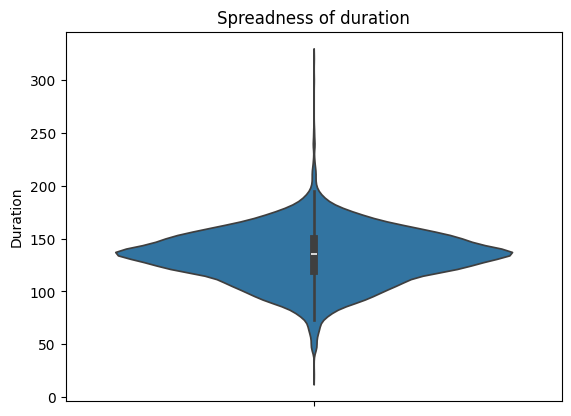

In [ ]:
sns.violinplot(y=data['Duration'])
plt.title('Spreadness of duration')
plt.show()

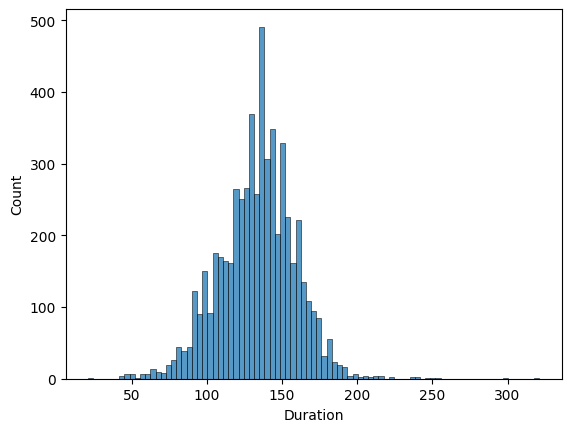

In [ ]:
sns.histplot(data['Duration'])
plt.show()

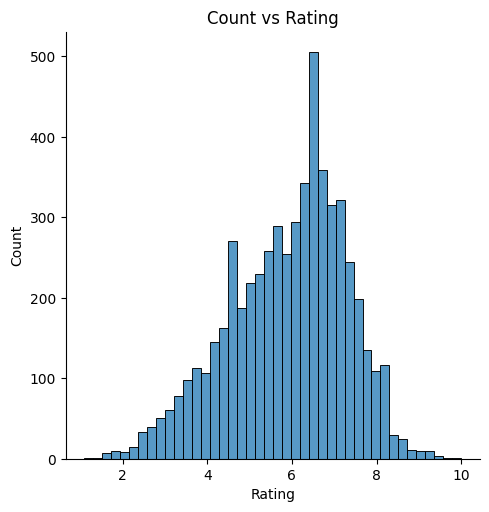

In [ ]:
sns.displot(data["Rating"])
plt.title("Count vs Rating")
plt.show()

<Axes: xlabel='Rating', ylabel='Votes'>

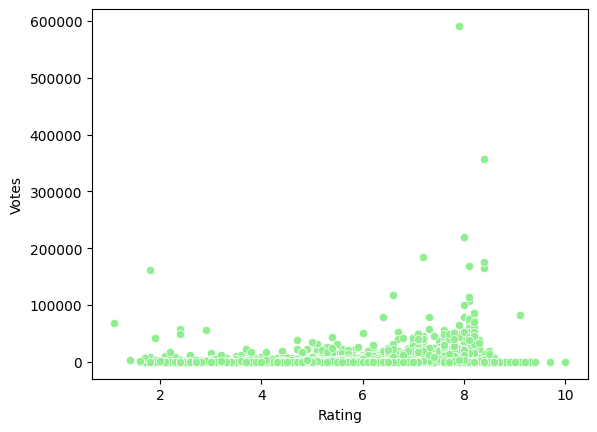

In [ ]:
sns.scatterplot(y="Votes",x="Rating",data=data,color="lightgreen")

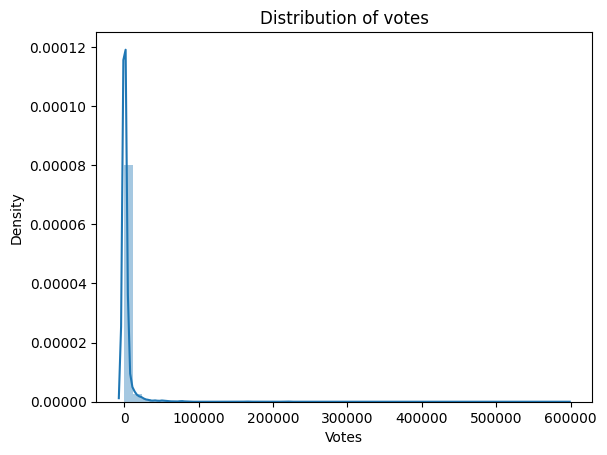

In [ ]:
sns.distplot(data['Votes'])
plt.title('Distribution of votes')
plt.show()

In [ ]:
# lets check the movies whose rating is greater than 8.4 and released in 2018 .
data.query("Rating>8.4 and Year == 2018")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1341,Atal Faisla,2018,127,Drama,8.8,5,Abdul Sattar,Sahil Akhtar,Himayat Ali,Aman Jain
7883,Kuch Der Aur,2018,65,Drama,8.5,41,Anurag Kawatra,Meenu Kawatra,Saajan Kataria,Rajesh Navgain
7939,Kutte Ki Dum,2018,143,Comedy,8.9,10,Sunil Patel,Raz Rehman Ali,Jass Boparai,Tanya Daang
8466,Maassab (The Teacher),2018,116,Drama,8.6,155,Aditya Om,Shiva Suryavanshi,Sheetal Singh,Manveer Choudhary
13676,T for Taj Mahal,2018,104,Drama,8.7,93,Kireet Khurana,Subrat Dutta,Pitobash,Manoj Pahwa
14714,Vada Chennai,2018,164,"Action, Crime, Drama",8.5,13120,Vetrimaaran,Dhanush,Ameer Sultan,Radha Ravi
15071,Win Marathon,2018,94,"Drama, Sport",9.0,70,Aryan Neeraaj Anand,Shubhanshu Satyadeo,Aryan Neeraaj Anand,Ankita Bahuguna


Average Rating Per Year

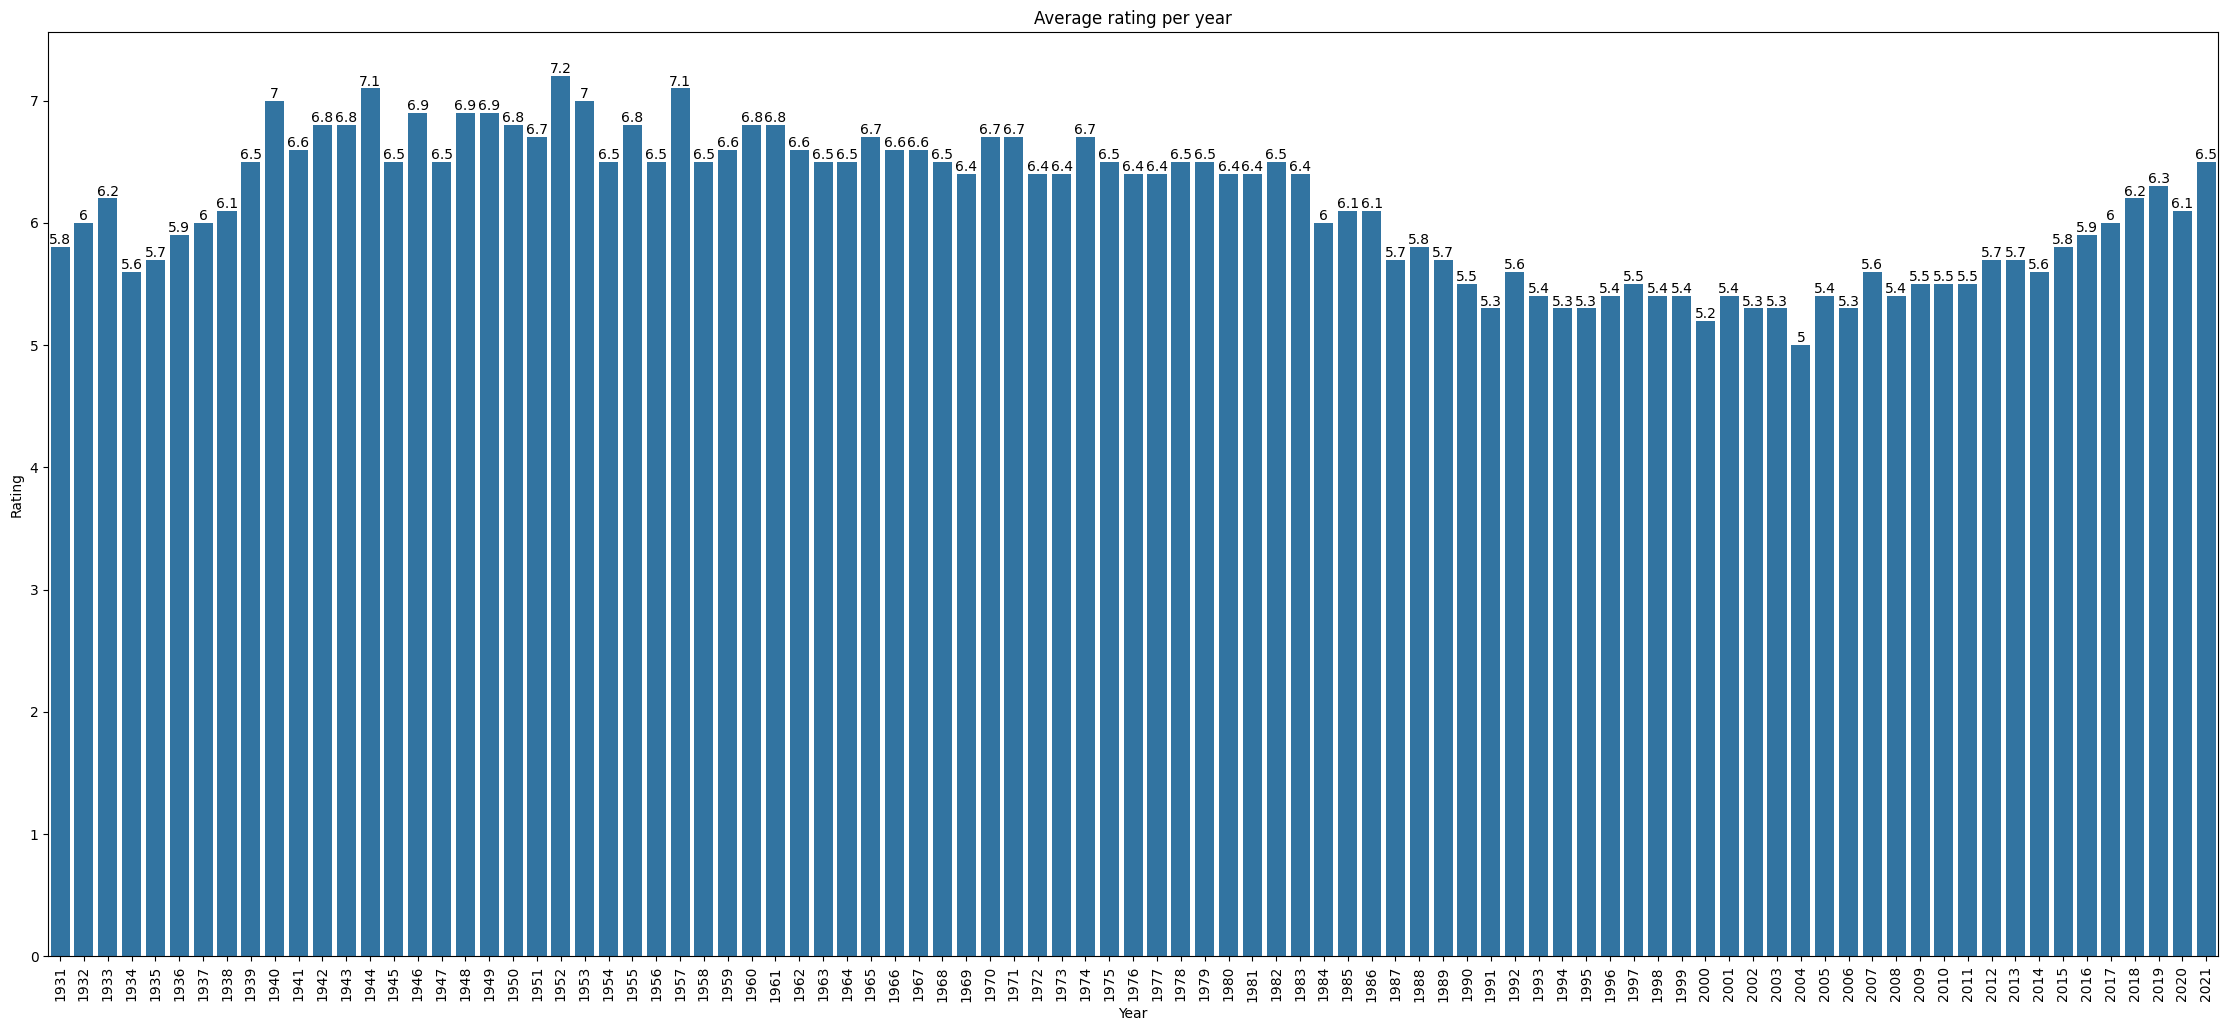

In [ ]:
import matplotlib.cm as cm

year_rating = (
    data.groupby('Year')['Rating']
        .mean()
        .reset_index()
        .sort_values(by='Rating', ascending=False)
        .round(1)
)

plt.figure(figsize=(28,12))
ax = sns.barplot(data=year_rating, x='Year', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Average rating per year')
plt.xticks(rotation=90)
plt.show()

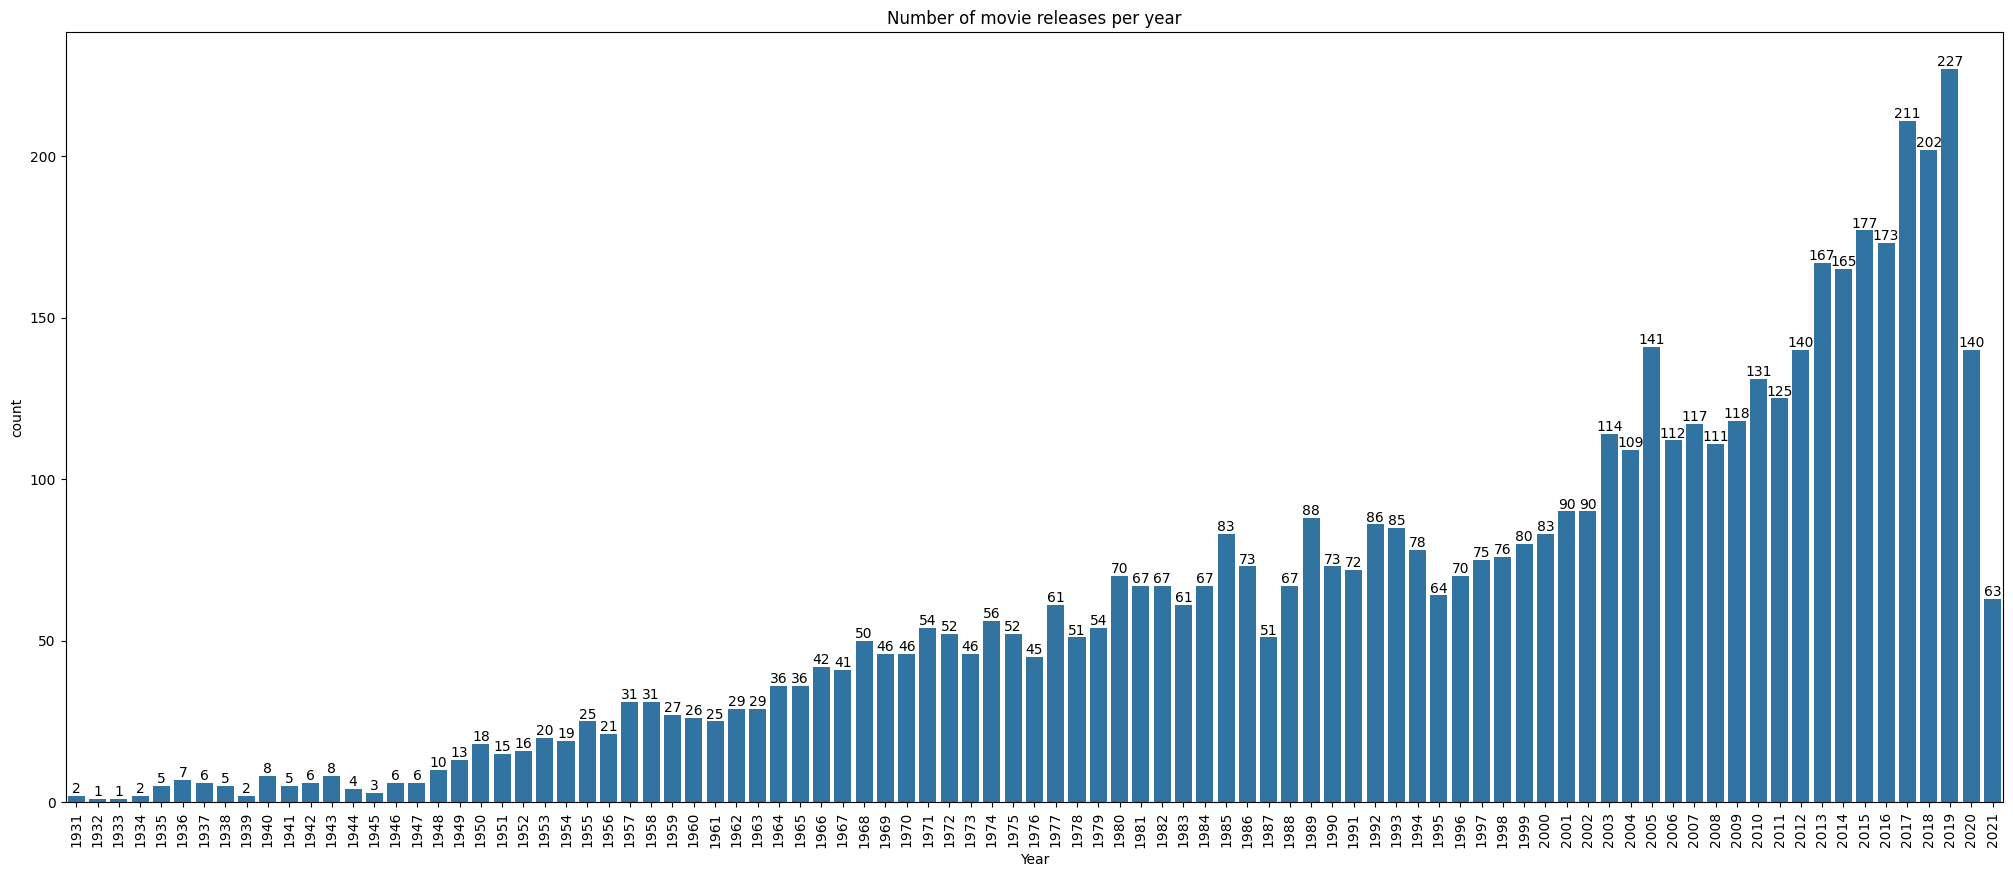

In [ ]:
# Number of movie release per year
year_count = data.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(25,10))
ax = sns.barplot(data=year_count, x='Year', y='count')
ax.bar_label(ax.containers[0])
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

In [ ]:
px.line(year_count, y="Year", x="count")

plot top ten high average rating director

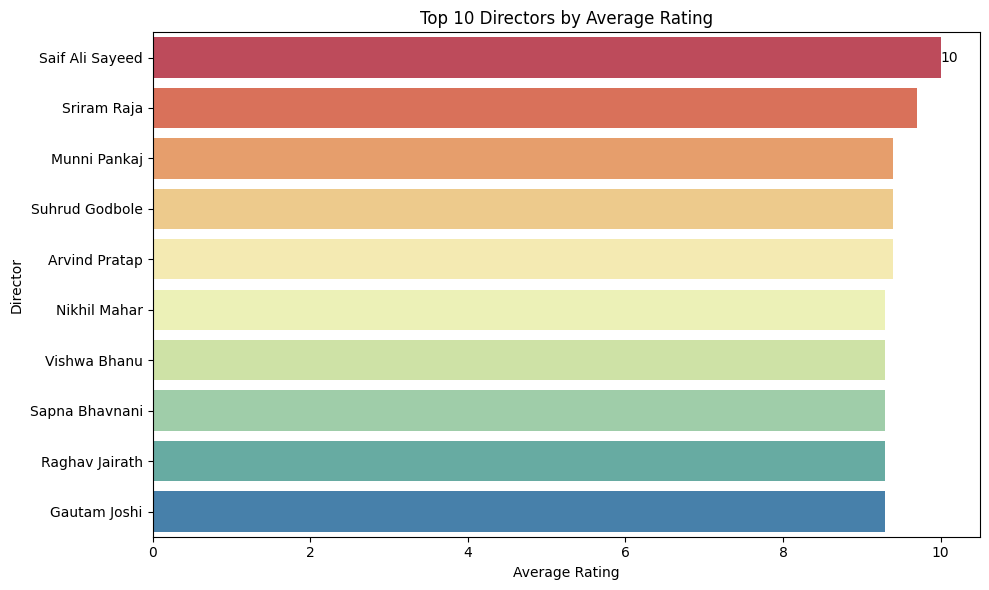

In [ ]:
director_rate = (
    data.groupby('Director')
        .agg({'Rating': 'mean'})
        .sort_values(by='Rating', ascending=False)
        .reset_index()
        .head(10)
)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=director_rate,
    x='Rating',
    y='Director',
    palette='Spectral'
)
ax.bar_label(ax.containers[0])
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

In [ ]:
data.corr(numeric_only=True)

,Year,Duration,Rating,Votes
Year,1.000000,-0.327567,-0.204642,0.129749
Duration,-0.327567,1.000000,0.001839,0.097621
Rating,-0.204642,0.001839,1.000000,0.142563
Votes,0.129749,0.097621,0.142563,1.000000


<Axes: >

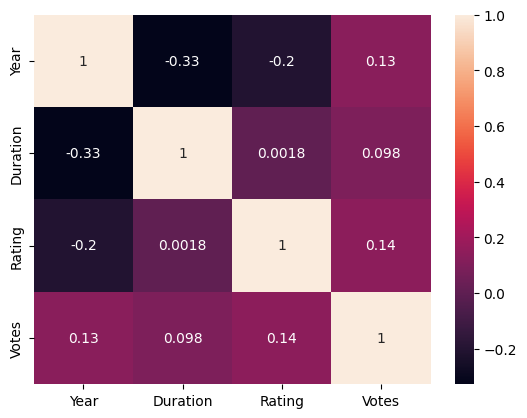

In [ ]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

<Axes: >

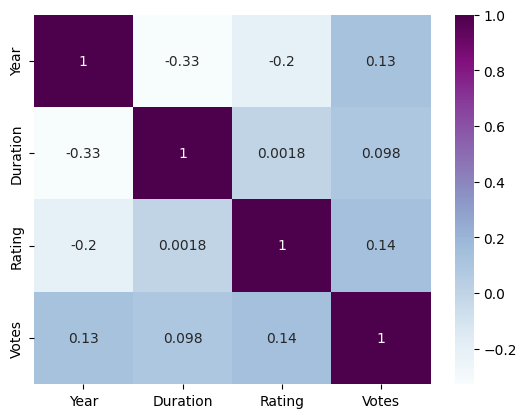

In [ ]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="BuPu")

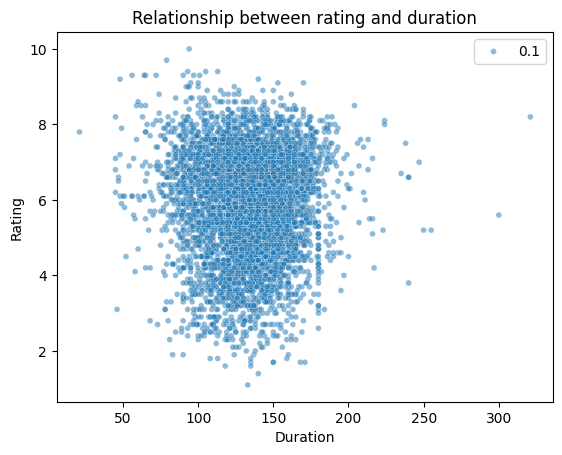

In [90]:
sns.scatterplot(data=data, x='Duration', y='Rating', size=0.1, alpha=0.5)
plt.title('Relationship between rating and duration')
plt.show()

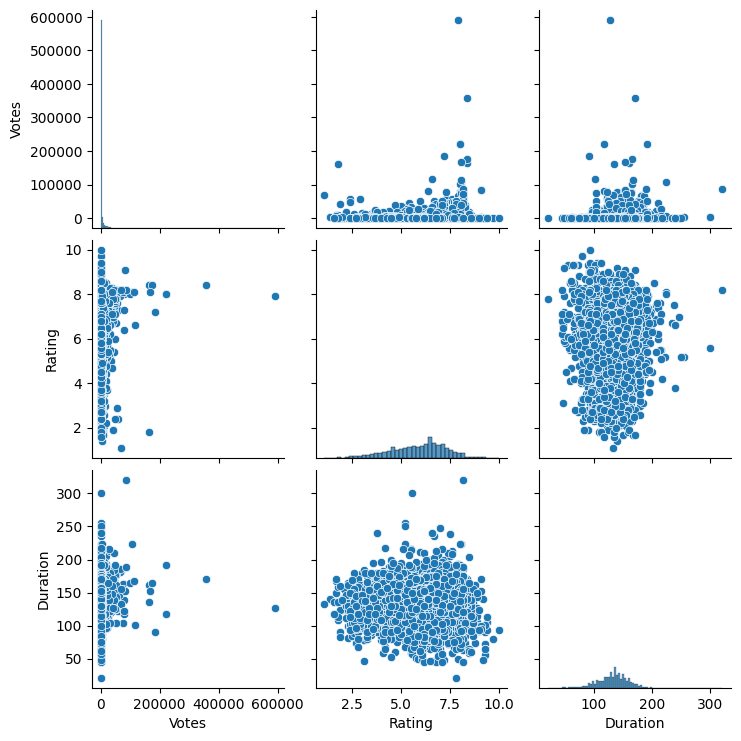

In [ ]:
sns.pairplot(data[['Votes', 'Rating', 'Duration']])

Target Encoding

In [ ]:
data_update = data.drop(['Name'], axis=1)

In [ ]:
actor1_encoding_map = data_update.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = data_update.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = data_update.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = data_update.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = data_update.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [ ]:
data_update['actor1_encoded'] = round(data_update['Actor 1'].map(actor1_encoding_map['Rating']),1)
data_update['actor2_encoded'] = round(data_update['Actor 2'].map(actor2_encoding_map['Rating']),1)
data_update['actor3_encoded'] = round(data_update['Actor 3'].map(actor3_encoding_map['Rating']),1)
data_update['director_encoded'] = round(data_update['Director'].map(director_encoding_map['Rating']),1)
data_update['genre_encoded'] = round(data_update['Genre'].map(genre_encoding_map['Rating']),1)

In [95]:
data_update.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
data_update.head()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109,7.0,8,6.8,7.0,7.0,7.0,6.4
3,2019,110,4.4,35,5.4,4.4,4.4,4.4,5.7
5,1997,147,4.7,827,4.8,5.8,5.9,5.3,6.2
6,2005,142,7.4,1086,5.4,6.9,6.5,7.4,6.8
8,2012,82,5.6,326,5.6,5.9,5.6,5.6,5.5


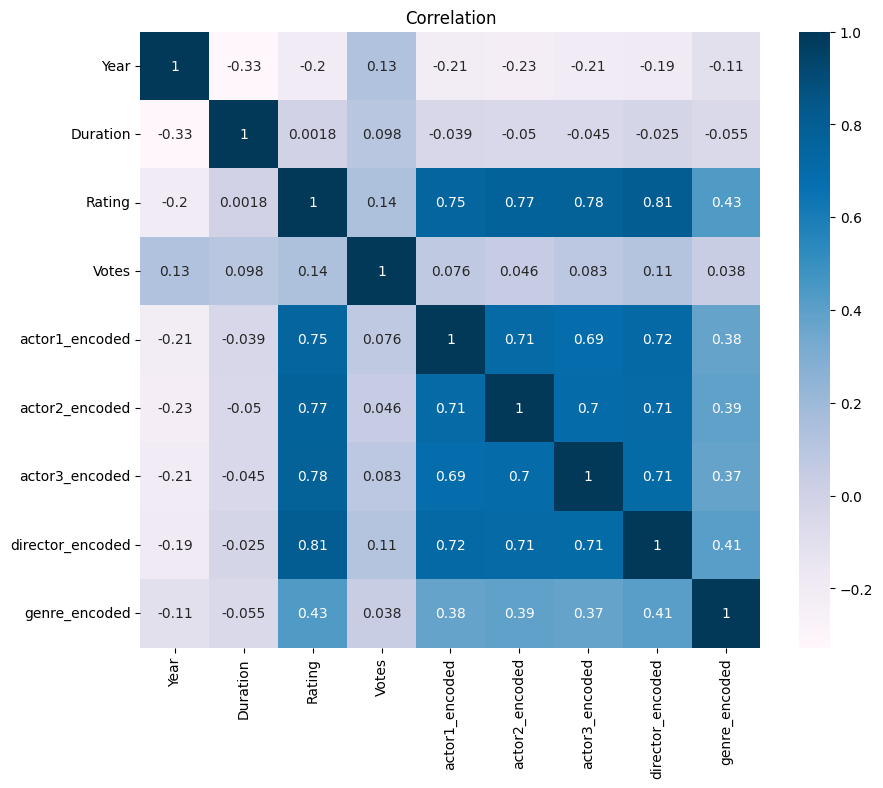

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data_update.corr(), annot=True, cmap='PuBu')
plt.title('Correlation')
plt.show()

In [ ]:
X = data_update.drop('Rating', axis=1)
y = data_update['Rating']

X.head()

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109,8,6.8,7.0,7.0,7.0,6.4
3,2019,110,35,5.4,4.4,4.4,4.4,5.7
5,1997,147,827,4.8,5.8,5.9,5.3,6.2
6,2005,142,1086,5.4,6.9,6.5,7.4,6.8
8,2012,82,326,5.6,5.9,5.6,5.6,5.5


In [98]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
X_train

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
9424,2016,143,13,8.0,8.0,8.0,8.0,6.4
12009,1942,153,30,6.3,6.0,6.8,6.9,6.4
4316,1989,147,455,6.0,5.4,7.2,6.2,7.5
6897,1961,139,467,6.9,6.6,6.8,6.7,6.2
2338,2012,74,22,6.4,6.4,6.4,5.4,6.4
...,...,...,...,...,...,...,...,...
10263,1979,120,159,6.7,6.0,6.2,6.0,6.2
14280,2010,75,62,5.0,5.7,5.7,5.7,5.7
14355,2005,88,35,4.8,4.1,5.6,4.1,5.5
14818,2018,135,12000,5.1,5.5,5.6,5.7,5.6


In [100]:
X_test

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
10971,1990,159,128,6.3,5.8,5.3,5.7,5.5
14052,2014,93,18,2.4,2.4,2.4,2.4,6.4
10002,1992,132,9,4.1,6.7,4.8,5.7,6.4
3970,1993,180,199,5.3,5.2,5.8,5.6,5.5
8840,2014,130,478,7.2,5.8,7.2,7.2,6.6
...,...,...,...,...,...,...,...,...
13713,2003,235,51,6.7,6.6,6.7,6.7,6.1
2820,2005,116,52,6.8,4.6,6.8,6.8,6.0
1810,1998,154,1852,6.0,5.0,5.7,4.5,5.3
13679,1999,179,5068,5.8,5.4,6.2,6.2,6.4


In [101]:
y_train

9424     8.0
12009    6.3
4316     7.2
6897     7.3
2338     6.4
        ... 
10263    6.0
14280    5.7
14355    4.1
14818    3.2
2209     4.9
Name: Rating, Length: 4527, dtype: float64

In [ ]:
# Initiate the model and fit into the training data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))

Coefficient of determination:  0.7869742924331744


In [ ]:
# Evaluating the model performance on the tested dataset
y_pred_LR = LR.predict(X_test)

In [104]:
y_pred_LR

array([5.65959308, 1.54663294, 5.36404163, ..., 4.97976599, 6.12079615,
       6.70173672], shape=(1132,))

In [105]:
r2_score(y_test, y_pred_LR)*100

77.10727279750978

In [106]:
# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_LR.ravel(),
                        'residual': y_test - y_pred_LR}
                      )
results.head()

,actual,predicted,residual
10971,6.0,5.659593,0.340407
14052,2.4,1.546633,0.853367
10002,3.8,5.364042,-1.564042
3970,3.8,5.452960,-1.652960
8840,7.2,7.163426,0.036574


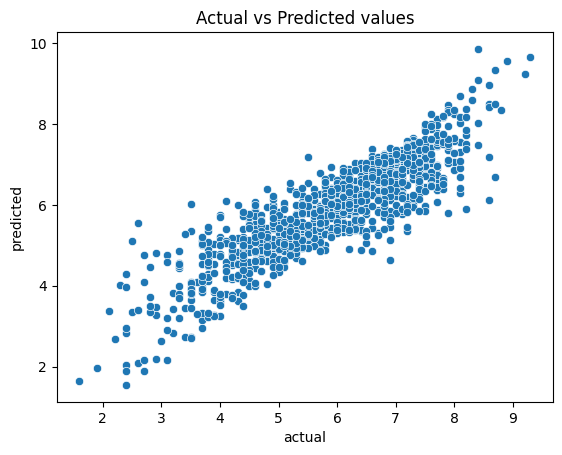

In [107]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'], y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()

In [108]:
data.to_csv("final_Indian_Movie_Rating_File.csv", index=False)